In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as mt
import pickle
import sys
import os

In [2]:
abs = os.getcwd()
abs = abs.replace("\\src\\Regression\\diamonds_price_prediction","") 

In [3]:
sys.path.insert(0, abs   + "\\utils")

In [4]:
from common import process_check
from common import process_normal
from common import process_standard
from common import process_labelencode
from common import RandomizedSCV
from common import iqr
from common import corr_mat
from common import co_mat

In [5]:
from regression import result_plot
from regression import scatter_plot
from regression import k_fold

In [6]:
data = pd.read_csv(abs + "/dataset/Regression/Diamonds_price/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
print(data.head())
print(data.shape)
print(data.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float

In [8]:
data.cut.unique()
data.clarity.unique()
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

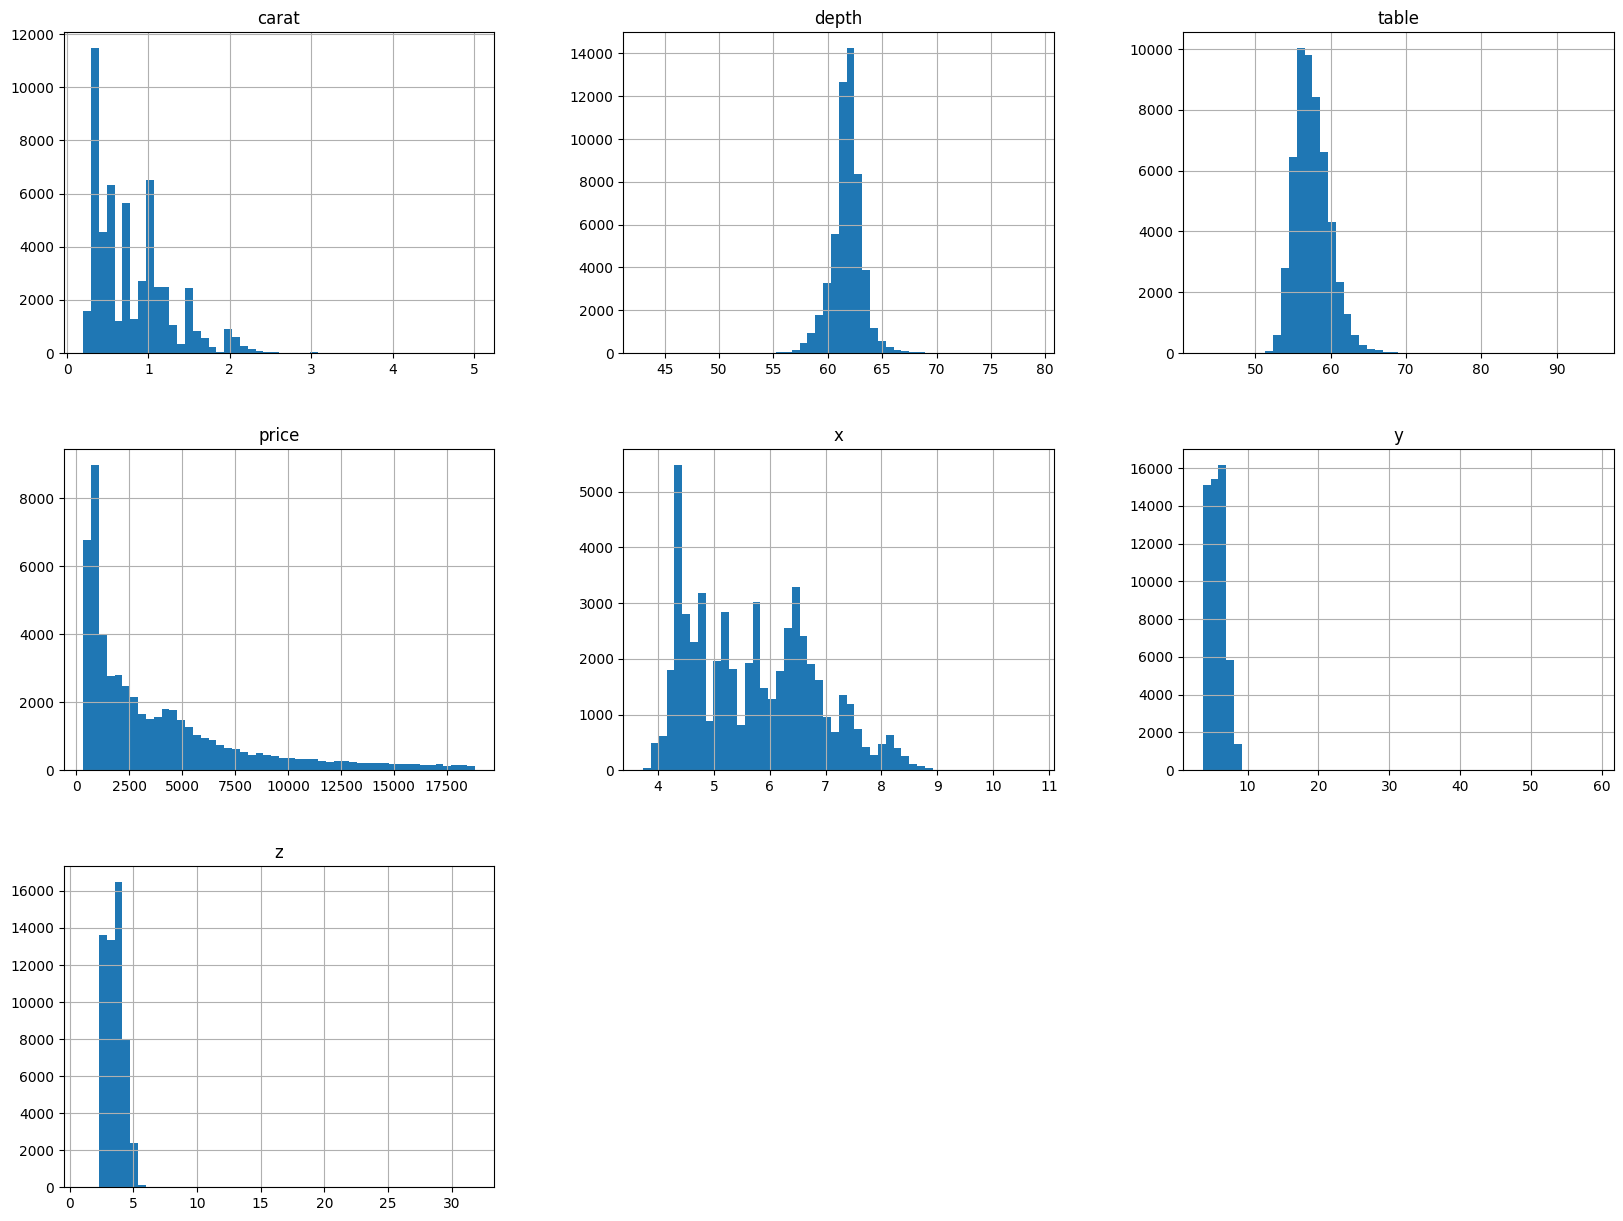

In [13]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
data['vol'] = data.x * data.y * data.z
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [15]:
data.drop(['x','y','z'], axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [16]:
data = iqr(data, "vol")
data = iqr(data, "carat")
data = iqr(data, "depth")
data = iqr(data, "table")

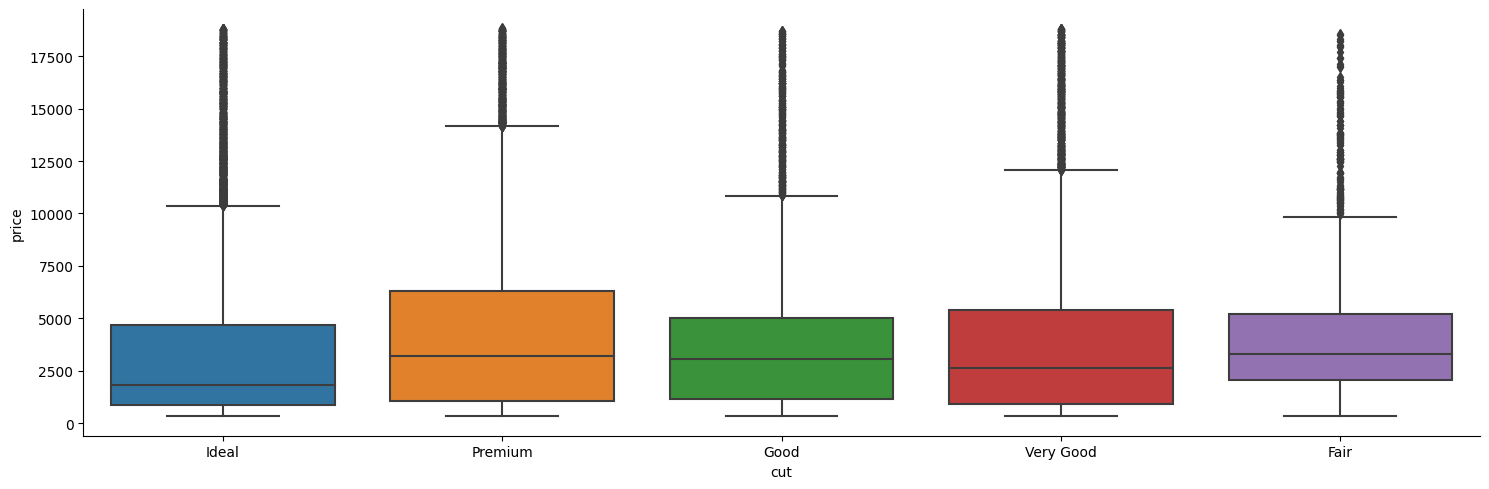

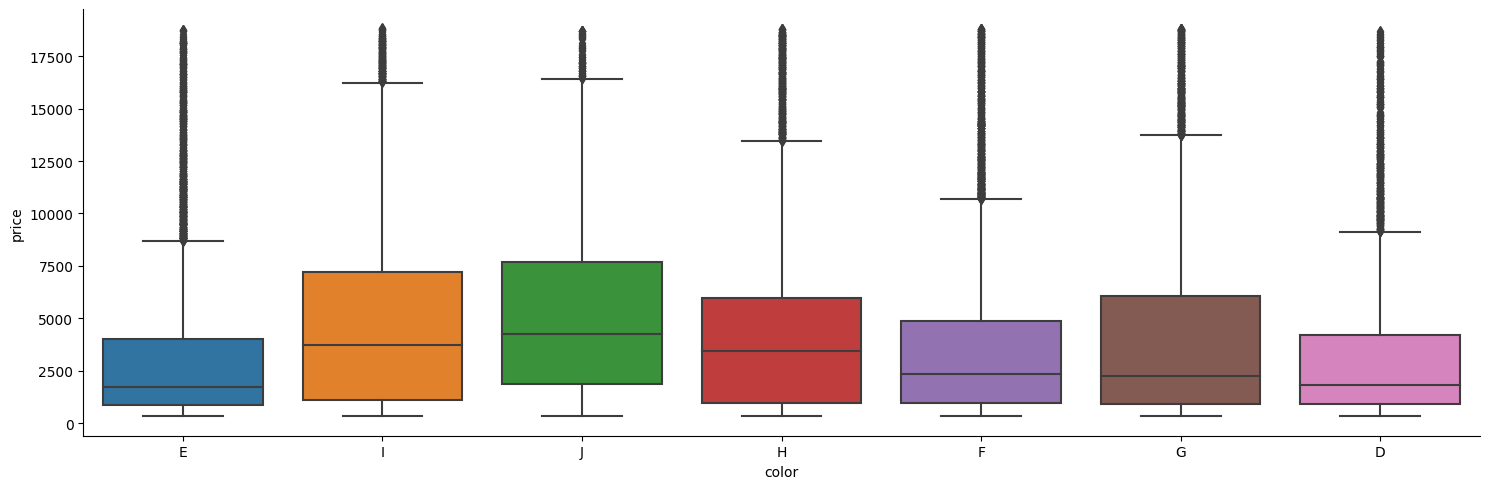

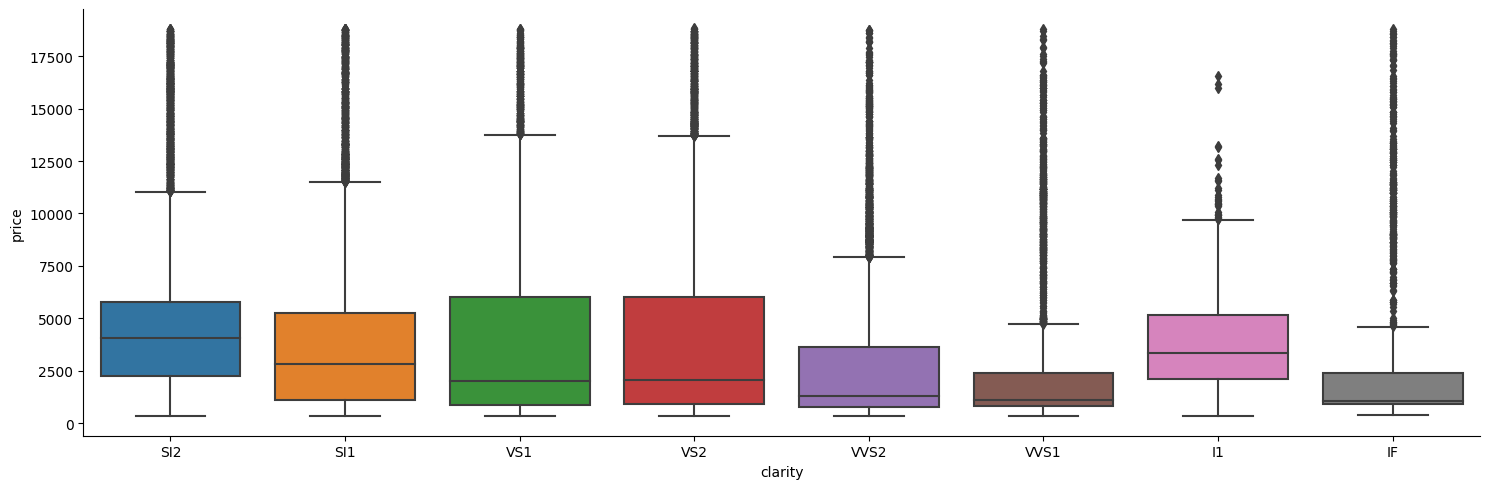

In [17]:
input_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);

In [18]:
print(data.cut.unique())
print(data.clarity.unique())
data.color.unique()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [19]:
data.cut, cut_label_encod = process_labelencode(data, "cut", True)
data.color, color_label_encod = process_labelencode(data, "color", True)
data.clarity, clarity_label_encod = process_labelencode(data, "clarity", True)

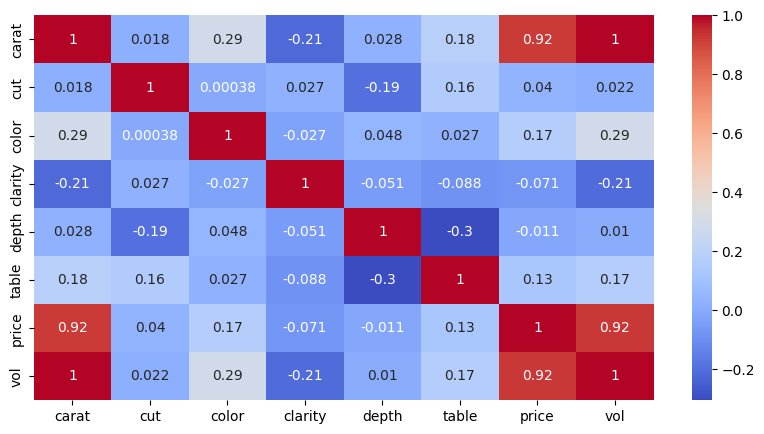

In [20]:
corr_mat(data)

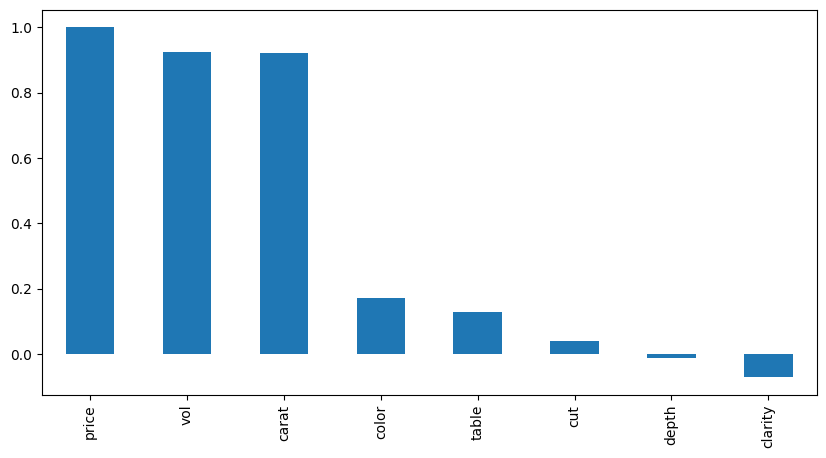

In [21]:
co_mat(data, 'price')

In [22]:
data.corr()['price'].abs().sort_values(ascending=False)

price      1.000000
vol        0.924201
carat      0.922336
color      0.171959
table      0.127316
clarity    0.070944
cut        0.040205
depth      0.010900
Name: price, dtype: float64

In [23]:
data.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [24]:
sca, norm = process_check(data)
print(sca, norm)

['cut', 'color', 'clarity', 'depth'] ['carat', 'table', 'price', 'vol']


In [25]:
sca = ['depth']
#norm = ['price']

In [26]:
norm = ['carat', 'table', 'vol']

In [27]:
data[sca], stand_diamond = process_standard(data, sca)
data[norm], normal_diamond = process_normal(data, norm)

In [28]:
norm = ['price']
data[norm], price_diamond = process_normal(data, norm)

In [29]:
data.shape

(53881, 8)

In [30]:
from sklearn.model_selection import KFold

In [31]:
x = data.drop(['price'], axis=1).to_numpy()
x.shape

(53881, 7)

In [32]:
y = data['price'].to_numpy()
y.shape

(53881,)

In [33]:
import sklearn.linear_model as sl
import sklearn.tree as st
import sklearn.ensemble as se
rf_model = se.RandomForestRegressor(n_estimators=100, random_state=42)
linreg = sl.LinearRegression()
tree = st.DecisionTreeRegressor(random_state=42)

In [34]:
k_fold(linreg, x, y)

accuracy of each fold - [0.8913153205743515, 0.8742693612784445, 0.8760760940513334, 0.8808623109191729, 0.8837868816787474, 0.8744061380324027, 0.8894416325906171, 0.8843949311012264, 0.8822594981507339, 0.8881540067932138]
Avg accuracy : 0.8824966175170242


In [35]:
k_fold(tree, x, y)

accuracy of each fold - [0.9640046279555495, 0.9657861668513329, 0.966233900056787, 0.9646704258056412, 0.970061132349529, 0.9675555709914172, 0.9707380090439992, 0.9681523335110176, 0.9665540727576544, 0.9660087875021397]
Avg accuracy : 0.9669765026825068


In [36]:
k_fold(rf_model, x, y)

accuracy of each fold - [0.9795030885268677, 0.9797026325318904, 0.982111512206192, 0.9819402554160636, 0.9823214299915343, 0.9815717163510478, 0.9830678258968322, 0.9813717841637538, 0.9815762451464797, 0.9820515920668591]
Avg accuracy : 0.9815218082297521


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = data.drop(['price'], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.008646,2,1,3,-0.175844,0.407407,0.011571
1,0.002882,3,1,2,-1.383204,0.629630,0.004985
2,0.008646,1,1,4,-3.442817,0.777778,0.011348
3,0.025937,3,5,5,0.463346,0.518519,0.026757
4,0.031700,1,6,3,1.102537,0.518519,0.036009


In [39]:
y = data['price']
y.head()

0    0.000000
1    0.000000
2    0.000054
3    0.000433
4    0.000487
Name: price, dtype: float64

In [40]:
import sklearn.linear_model as sl
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 40)
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [41]:
print('R squared of the Linear Regression on training set: {:.2%}'.format(linreg.score(X_train, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 88.16%
R squared of the Linear Regression on test set: 88.58%


In [42]:
y_pred = linreg.predict(X_test)

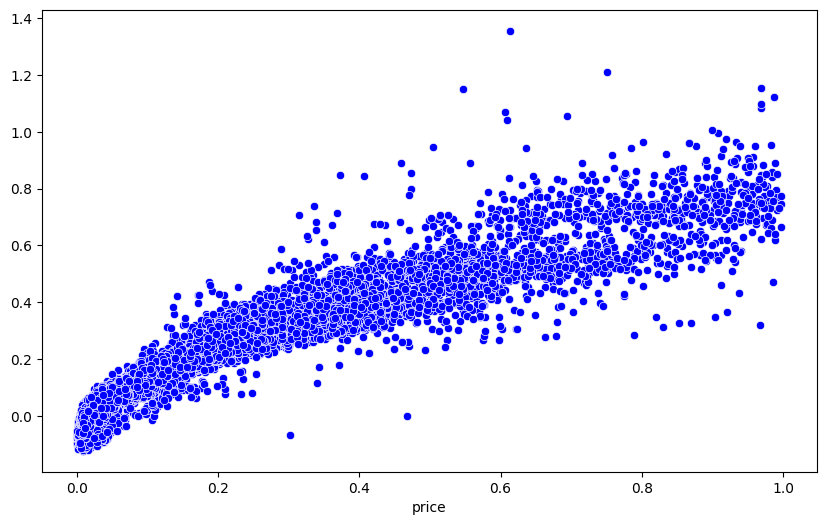

In [43]:
scatter_plot(y_test, y_pred)

In [44]:
from sklearn.metrics import mean_absolute_error as mae
score = linreg.score(X_test,y_test)
error = mae(y_test,y_pred)
y_true, Y_pred = np.array(y_test), np.array(y_pred)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.8857550741117018
0.049593315626947056
99.24877380938088
30.5086090532621


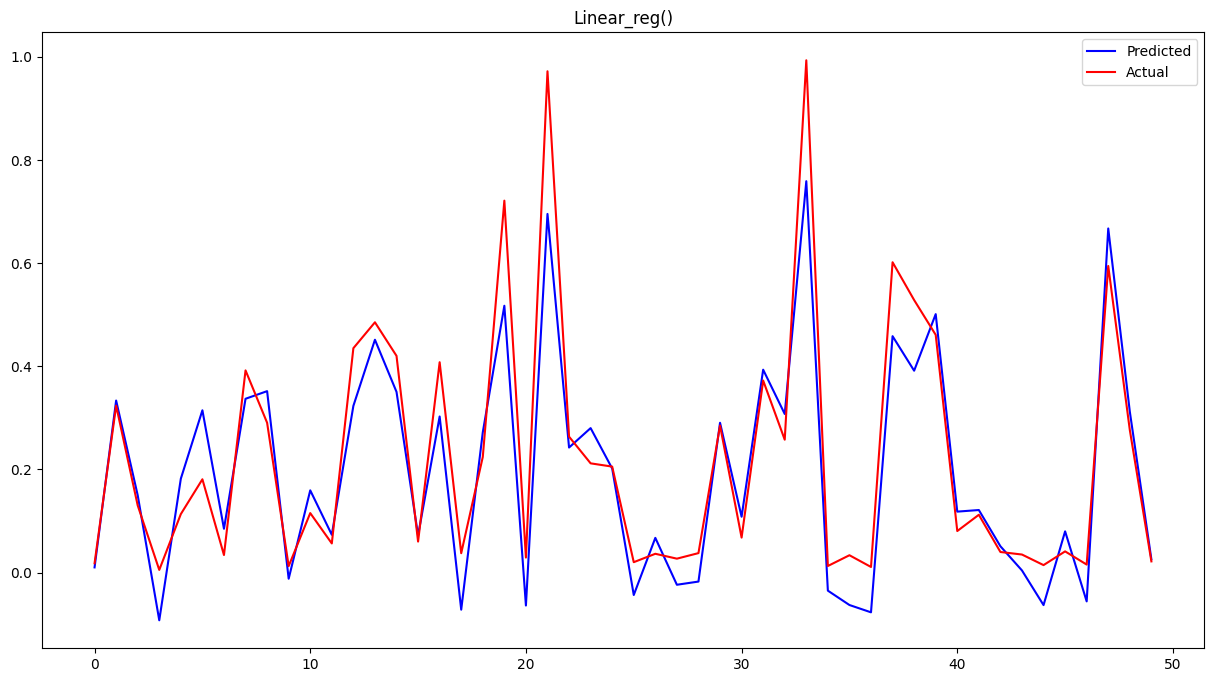

In [45]:
result_plot(y_test,y_pred,"Linear_reg()")

In [46]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 40)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree.score(X_train, y_train)))
print('R squared of the Decision Tree Regressor on test set: {:.2%}'.format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 96.60%


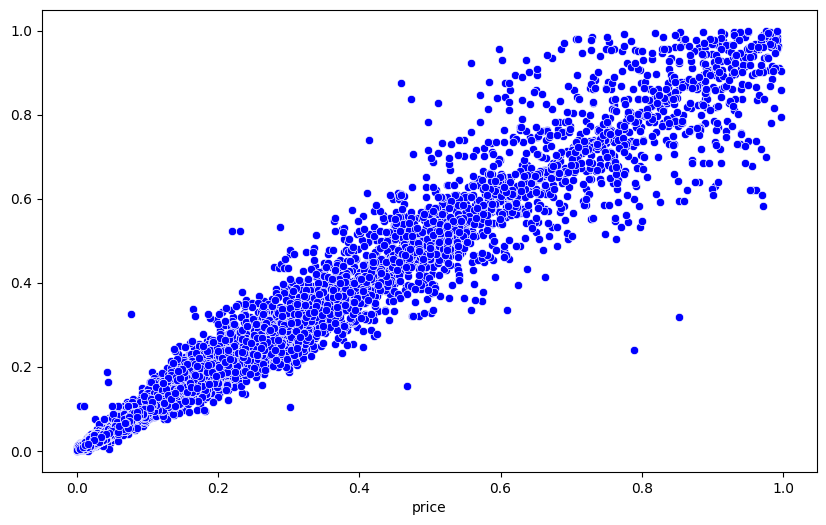

In [48]:
y_pred1 = tree.predict(X_test)
scatter_plot(y_test, y_pred1)

In [49]:
score = tree.score(X_test,y_test)
error = mae(y_test,y_pred1)
y_true, Y_pred = np.array(y_test), np.array(y_pred1)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.9659785708384412
0.01938375404617166
16.171981723280084
8.979516059162076


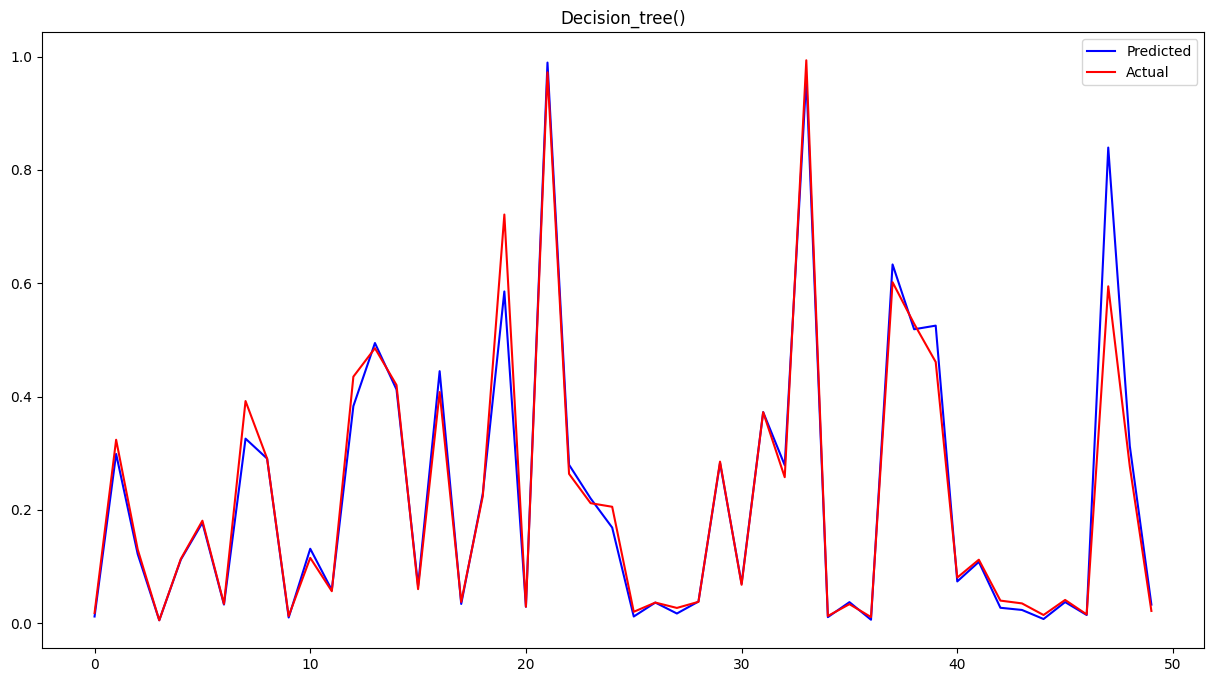

In [50]:
result_plot(y_test,y_pred1,"Decision_tree()")

In [51]:
import sklearn.ensemble as se
rf_model = se.RandomForestRegressor(n_estimators=100, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 40)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf_model.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf_model.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.73%
R squared of the Random Forest Regressor on test set: 98.04%


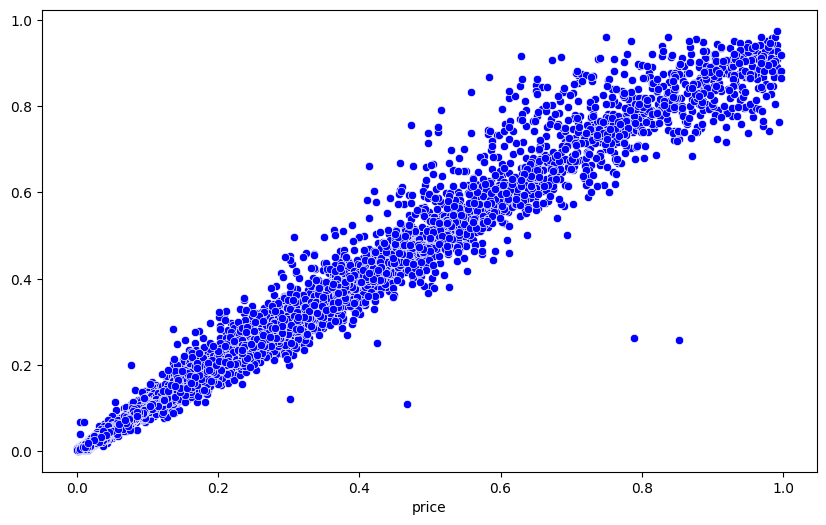

In [53]:
y_pred2 = rf_model.predict(X_test)
scatter_plot(y_test, y_pred2)

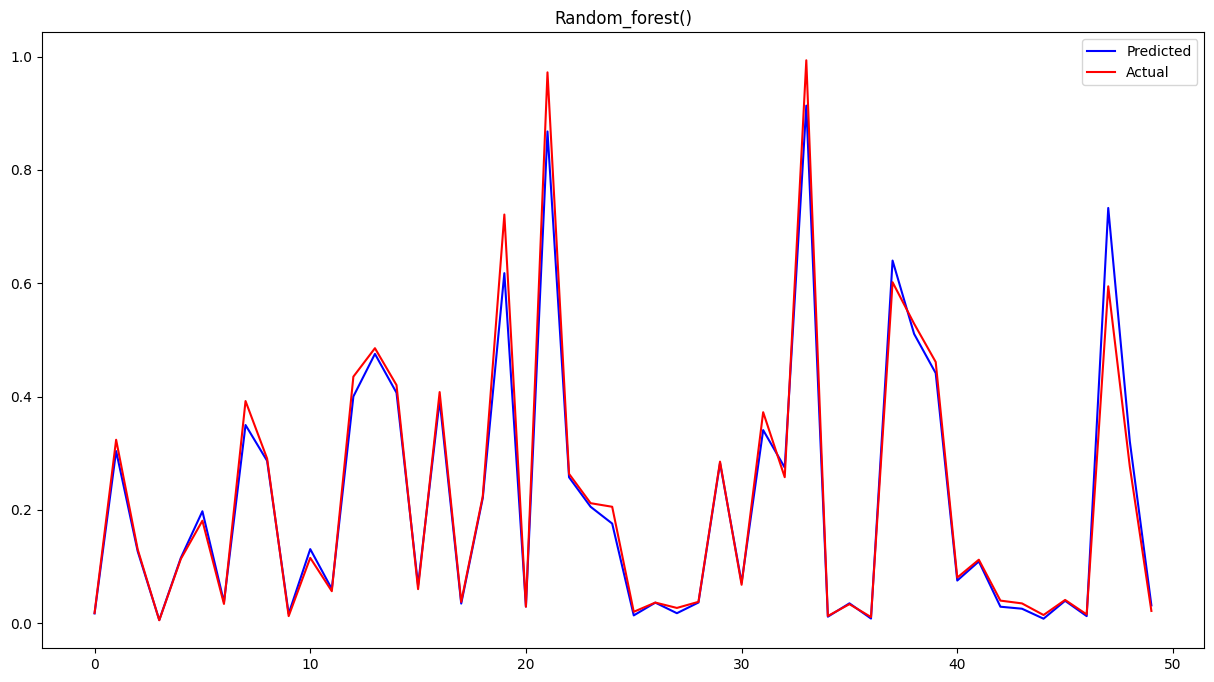

In [54]:
result_plot(y_test,y_pred2,"Random_forest()")

In [55]:
score = rf_model.score(X_test,y_test)
error = mae(y_test,y_pred2)
y_true, Y_pred = np.array(y_test), np.array(y_pred2)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.9804210036316868
0.015218281024918276
13.362767745903218
7.535759152907443


In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80],
    'max_features': [10, 12],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [9, 10],
    'n_estimators': [50, 100]
}
print(param_grid)


{'bootstrap': [True], 'max_depth': [70, 80], 'max_features': [10, 12], 'min_samples_leaf': [3, 4], 'min_samples_split': [9, 10], 'n_estimators': [50, 100]}


In [57]:
rf = se.RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 80],
                         'max_features': [10, 12], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [9, 10],
                         'n_estimators': [50, 100]},
             verbose=2)

In [58]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 100}

In [59]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features=10, min_samples_leaf=3,
                      min_samples_split=9)

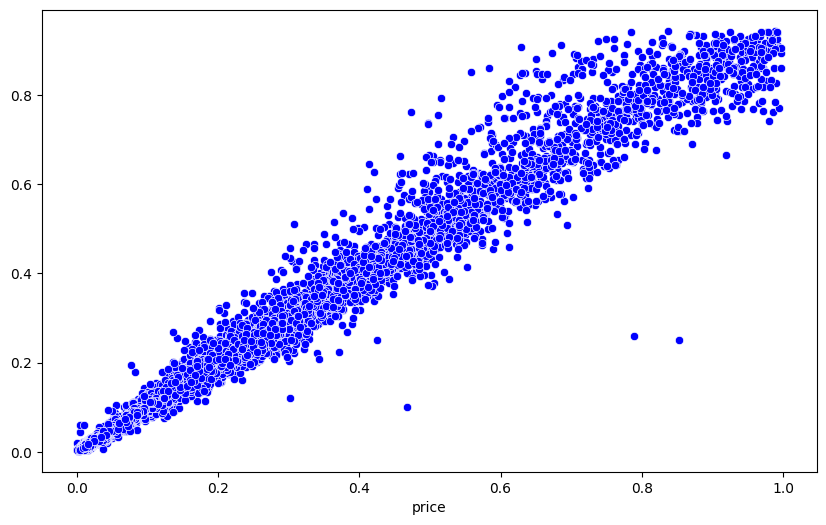

In [60]:
y_pred3 = best_grid.predict(X_test)
scatter_plot(y_test, y_pred3)

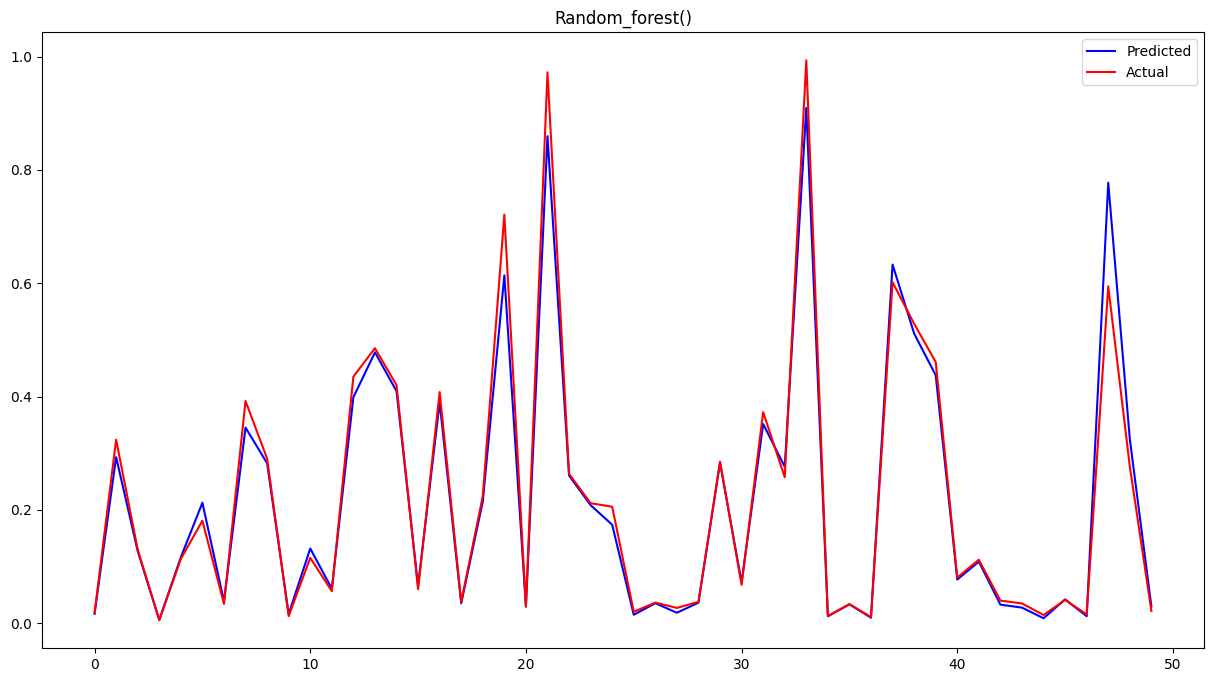

In [61]:
result_plot(y_test,y_pred3,"Random_forest()")

In [65]:
score = best_grid.score(X_test,y_test)
error = mae(y_test,y_pred3)
y_true, Y_pred = np.array(y_test), np.array(y_pred3)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)

0.9798998659460365
0.015386250217428572
13.01153333948965


In [66]:
abs

'c:\\Users\\abulf\\Documents\\Python_tutorial\\Assignments\\ML_framework'

In [67]:
pickle.dump(best_grid, open(abs + "\\output\\Regression\\diamonds_price\\rf_model.pkl", 'wb'))
pickle.dump(cut_label_encod, open(abs + "\\output\\Regression\\diamonds_price\\cut_label_encod.pkl", 'wb'))
pickle.dump(color_label_encod, open(abs + "\\output\\Regression\\diamonds_price\\color_label_encod.pkl", 'wb'))
pickle.dump(clarity_label_encod, open(abs + "\\output\\Regression\\diamonds_price\\clarity_label_encod.pkl", 'wb'))
pickle.dump(stand_diamond, open(abs + "\\output\\Regression\\diamonds_price\\stand_diamond.pkl", 'wb'))
pickle.dump(normal_diamond, open(abs + "\\output\\Regression\\diamonds_price\\normal_diamond.pkl", 'wb'))
pickle.dump(price_diamond, open(abs + "\\output\\Regression\\diamonds_price\\price_diamond.pkl", 'wb'))

In [51]:
carat = float(input("Carat(max=5): "))
cut = (input("Cut['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']: "))
color = (input("Color['E', 'I', 'J', 'H', 'F', 'G', 'D']: "))
clarity = (input("Clarity['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']: "))
depth = float(input("Depth(max=70): "))
table = float(input("Table(max=90): "))
x = float(input("Dimension in X direction(max=10): "))
y = float(input("Dimension in Y direction(max=50): "))
z = float(input("Dimension in Z direction(max=30): "))
vol = x*y*z

In [52]:
cut_lst = []
cut_lst.append(cut)
color_code_lst = []
color_code_lst.append(color)
clar_lst = []
clar_lst.append(clarity)
cut= cut_label_encod.transform(cut_lst)
color = color_label_encod.transform(color_code_lst)
clarity = clarity_label_encod.transform(clar_lst)

In [53]:
sca = []
sca.append(depth)
sca = np.reshape(sca, (-1,1 ))
sca1 = stand_diamond.transform(sca)

In [54]:
nor = []
nor.append(carat)
nor.append(table)
nor.append(vol)
nor = np.reshape(nor, (-1,3 ))
nor1 = normal_diamond.transform(nor)

In [55]:
main_lst = []
main_lst.append(nor1[0][0])
main_lst.append(cut[0])
main_lst.append(color[0])
main_lst.append(clarity[0])
main_lst.append(sca1[0][0])
main_lst.append(nor1[0][1])
main_lst.append(nor1[0][2])
main_lst = np.reshape(main_lst, (-1,7 ))
main_lst

array([[  0.80691643,   1.        ,   4.        ,   4.        ,
        -18.99645197,   0.03703704,   3.28440196]])

In [56]:
pred = rf_model.predict(main_lst)
pred = np.reshape(pred, (-1,1 ))
pred = price_diamond.inverse_transform(pred)
pred[0][0]

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


16898.03749999999